In [73]:
import pandas as pd
import seaborn as sns
import numpy as np

**영국 중고 자동차 가격 데이터**


In [74]:
# csv 파일 불러오기
car = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cars.csv')
brand = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/brand.csv')

불러온 파일 기본 정보 확인

In [75]:
car.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [76]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [77]:
car.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [78]:
brand.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [79]:
# brand 의 title의 값을 대문자로 변경
brand['title']=brand['title'].str.upper()

In [80]:
brand.head()

,title,country
0,SKODA,Czech Republic
1,VAUXHALL,United Kingdom
2,HYUNDAI,South Korea
3,MINI,United Kingdom
4,FORD,United States


In [81]:
# 국가별 브랜드 갯수 확인
brand['country'].value_counts()

,count
country,
Japan,11
United Kingdom,8
Germany,6
United States,5
France,4
South Korea,4
Italy,4
Sweden,2
Czech Republic,1


In [82]:
# car와 brand 데이터 병합 열은 title을 기준 car의 데이터가 더 중요함으로 left를 사용

car.merge(brand,on ='title',how = 'left')

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,NaN
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,NaN
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,NaN


county와 brand의 title을 살리고 싶음 다른 방법으로 병합하기로 결정

*   car의 데이터에서 brand만 따로 추출
*   병합시 brand와 country 같이 나오게끔 병합 할 예정



In [83]:
#car['brand']를 생성
car['brand']=car['title'].str.split().str[0]

In [84]:
car

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,RENAULT
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,AUDI
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,BMW
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,HONDA


원하는 데이터 생성 확인,
한번 더 car 와 brand 병합 이번엔 brand 와 country를 살릴예정

In [85]:
car = car.merge(brand, how = 'left', left_on = 'brand', right_on = 'title')

In [86]:
#brand 값과 title_y 값이 동일하므로 title_y 열을 삭제
car.drop('title_y',axis=1,inplace = True)

In [87]:
car

,title_x,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,RENAULT,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,AUDI,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,BMW,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,HONDA,Japan


In [88]:
# title_x를 다시 title로 이름변경
car.rename(columns = {'title_x':'title'},inplace = True)

In [89]:
car

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,RENAULT,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,AUDI,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,BMW,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,HONDA,Japan


**결측치 확인 및 결측치 처리 과정**


In [90]:
car.isna().sum()

,0
title,0
Price,0
Mileage(miles),0
Registration_Year,0
Previous Owners,1411
Fuel type,0
Body type,0
Engine,45
Gearbox,0
Doors,25


In [91]:
#가장 많은 Service history 값 먼저 처리하기로 결정, 중고차 특성상 서비스는 한번은 받을거라 가정하지만 몇 번인지는 정확하지 않기에 unknown 값으로 대체
car['Service history'] = car['Service history'].fillna('Unknown')

In [92]:
#제대로 들어갔는지 확인
car.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,Unknown,VAUXHALL,United Kingdom


In [93]:
# Previous Owners의 결측치는 3000개 이상으로 전부 드랍하기엔 수가 너무 많아 노이즈가 생길것으로 추정 평균값으로 채우기로 결정
car['Previous Owners'] = car['Previous Owners'].fillna(car['Previous Owners'].mean())

In [94]:
car['Previous Owners']

,Previous Owners
0,3.000000
1,4.000000
2,2.807557
3,5.000000
4,2.807557
...,...
3682,4.000000
3683,2.807557
3684,2.807557
3685,2.807557


In [95]:
#결측치 갯수 확인
car['Previous Owners'].isna().sum()

np.int64(0)

In [96]:
#나머지 결측치는 비율로 확인
car.isna().mean()

,0
title,0.000000
Price,0.000000
Mileage(miles),0.000000
Registration_Year,0.000000
Previous Owners,0.000000
Fuel type,0.000000
Body type,0.000000
Engine,0.012205
Gearbox,0.000000
Doors,0.006781


In [97]:
#1%이하는 드랍하기로 결정 하지만 Engine 이랑 Emisson Class은 차종에 따라 상이 하므로 나머지 결측치는 드랍하기로 결정
car.dropna(inplace = True)

In [98]:
#결측치 갯수 확인
car.isna().sum()

,0
title,0
Price,0
Mileage(miles),0
Registration_Year,0
Previous Owners,0
Fuel type,0
Body type,0
Engine,0
Gearbox,0
Doors,0


**자료형 변수를 숫자 형태로 변환**

1.   Engine의 변수를 숫자형태로 변경



In [99]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3593 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3593 non-null   object 
 1   Price              3593 non-null   int64  
 2   Mileage(miles)     3593 non-null   int64  
 3   Registration_Year  3593 non-null   int64  
 4   Previous Owners    3593 non-null   float64
 5   Fuel type          3593 non-null   object 
 6   Body type          3593 non-null   object 
 7   Engine             3593 non-null   object 
 8   Gearbox            3593 non-null   object 
 9   Doors              3593 non-null   float64
 10  Seats              3593 non-null   float64
 11  Emission Class     3593 non-null   object 
 12  Service history    3593 non-null   object 
 13  brand              3593 non-null   object 
 14  country            3593 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 449.1+ KB


In [100]:
car['Engine'] = car['Engine'].str.split('L').str[0]
car['Engine'] = car['Engine'].astype('float')

In [101]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3593 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3593 non-null   object 
 1   Price              3593 non-null   int64  
 2   Mileage(miles)     3593 non-null   int64  
 3   Registration_Year  3593 non-null   int64  
 4   Previous Owners    3593 non-null   float64
 5   Fuel type          3593 non-null   object 
 6   Body type          3593 non-null   object 
 7   Engine             3593 non-null   float64
 8   Gearbox            3593 non-null   object 
 9   Doors              3593 non-null   float64
 10  Seats              3593 non-null   float64
 11  Emission Class     3593 non-null   object 
 12  Service history    3593 non-null   object 
 13  brand              3593 non-null   object 
 14  country            3593 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 449.1+ KB


**이상치 확인 및 처리**

In [102]:
#describe를 통해 의심가는 이상치 확인
car.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats
count,3593.000000,3.593000e+03,3593.000000,3593.000000,3593.000000,3593.000000,3593.000000
mean,5791.841637,8.151118e+04,2011.953799,2.806132,1.603173,4.318675,4.898692
std,4515.066997,3.954136e+04,4.741254,1.216203,0.485475,0.986281,0.575368
min,400.000000,1.000000e+00,1993.000000,1.000000,0.800000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,1.300000,3.000000,5.000000
50%,3999.000000,8.000000e+04,2012.000000,2.807557,1.600000,5.000000,5.000000
75%,7999.000000,1.030990e+05,2016.000000,3.000000,1.900000,5.000000,5.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,6.300000,5.000000,7.000000


Price 와 Mileage의 값이 의심가는걸 확인 더 자세히 볼 필요가 있어보임

<Axes: xlabel='None', ylabel='Price'>

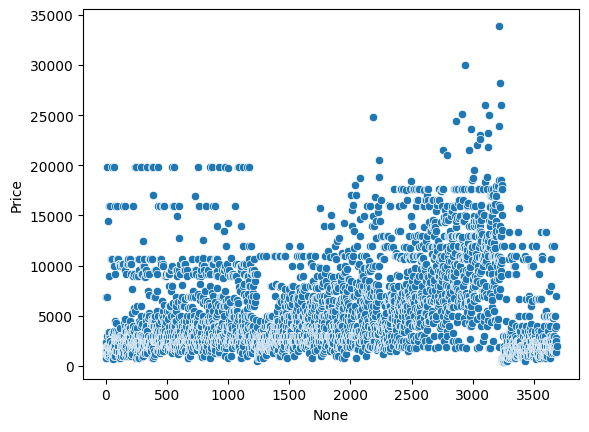

In [103]:
sns.scatterplot(x= car.index, y= car['Price'])

Price의 경우 중고차 특성상 가격이 매우 상이하기에 일단 이상치로 분류는 안하는 것으로 결정

<Axes: xlabel='None', ylabel='Mileage(miles)'>

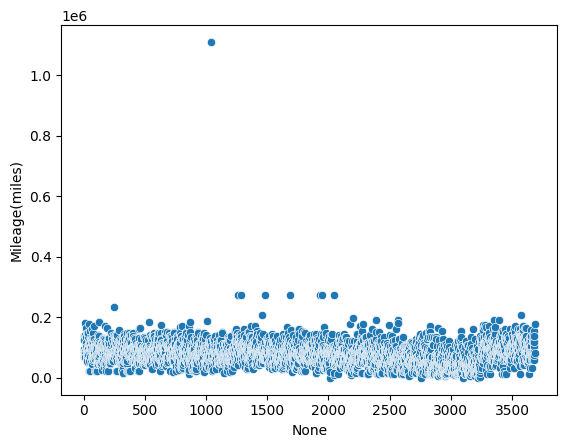

In [104]:
sns.scatterplot(x= car.index, y=car['Mileage(miles)'])

In [105]:
#outlier가 있어보임 확인 필요해 sort_value로 확인
car['Mileage(miles)'].sort_values(ascending= False)

,Mileage(miles)
1037,1110100
1283,274100
1478,274100
2048,274100
1933,274100
...,...
2760,1048
3102,222
2013,6
3219,1


In [106]:
car.loc[1037]

,1037
title,VOLKSWAGEN BEETLE
Price,2495
Mileage(miles),1110100
Registration_Year,2003
Previous Owners,4.0
Fuel type,Petrol
Body type,Hatchback
Engine,2.0
Gearbox,Automatic
Doors,3.0


자동차의 평균 주행거리는 10,000 ~ 20,000km mile 로 변환시 6,213~ 12,427mile

2003~ 2025 까지해도 평균치를 훨씬 넘어서는것으로 확인 outlier로 간주 하고 삭제하기로 결정

In [107]:
car = car[car['Mileage(miles)'] <= 1000000]

In [108]:
car['Mileage(miles)'].max()

274100

<Axes: xlabel='None', ylabel='Mileage(miles)'>

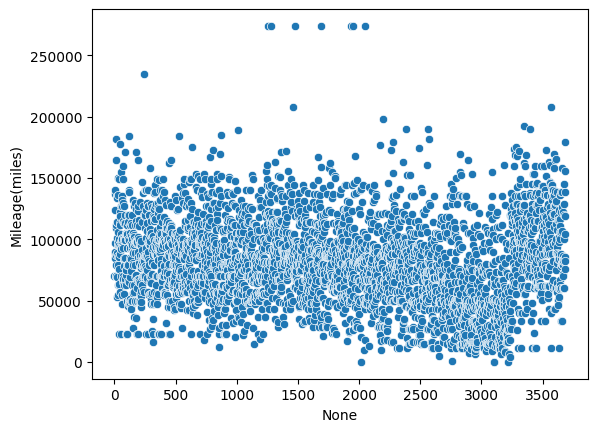

In [109]:
sns.scatterplot(x= car.index, y=car['Mileage(miles)'])

Mileage 에 대한 이상치 제거를 확인

<Axes: xlabel='None', ylabel='Emission Class'>

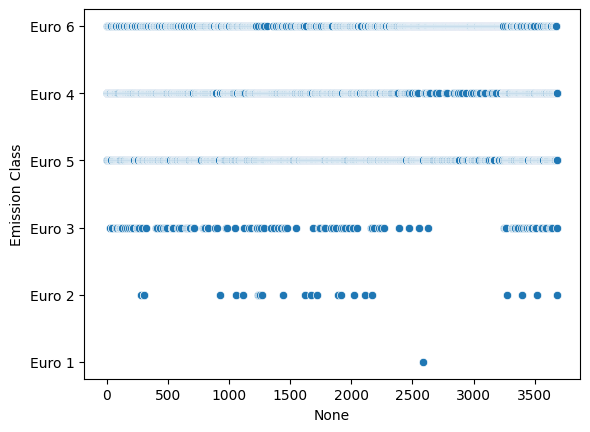

In [110]:
#Emission Class 이상치 확인
sns.scatterplot(x= car.index, y=car['Emission Class'])

In [111]:
#Emission class min값 위치 확인
car['Emission Class'].sort_values()

,Emission Class
2590,Euro 1
278,Euro 2
3271,Euro 2
1719,Euro 2
1114,Euro 2
...,...
2425,Euro 6
2423,Euro 6
2418,Euro 6
2415,Euro 6


In [112]:
car.loc[2590]

,2590
title,VOLKSWAGEN POLO
Price,2750
Mileage(miles),31000
Registration_Year,1993
Previous Owners,1.0
Fuel type,Petrol
Body type,Coupe
Engine,1.0
Gearbox,Manual
Doors,3.0


1993년 생산으로 값이 크게 이상한 점은 없음으로 결론

<Axes: xlabel='None', ylabel='Previous Owners'>

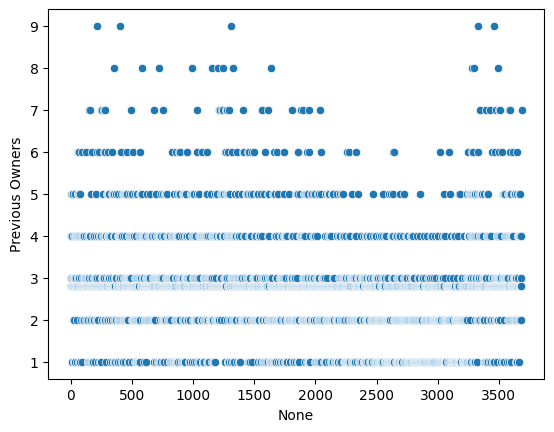

In [113]:
sns.scatterplot(x= car.index, y=car['Previous Owners'])

<Axes: xlabel='None', ylabel='Doors'>

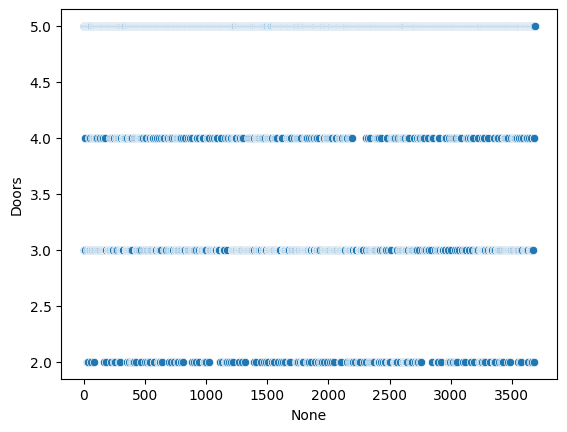

In [114]:
sns.scatterplot(x= car.index, y=car['Doors'])

<Axes: xlabel='None', ylabel='Seats'>

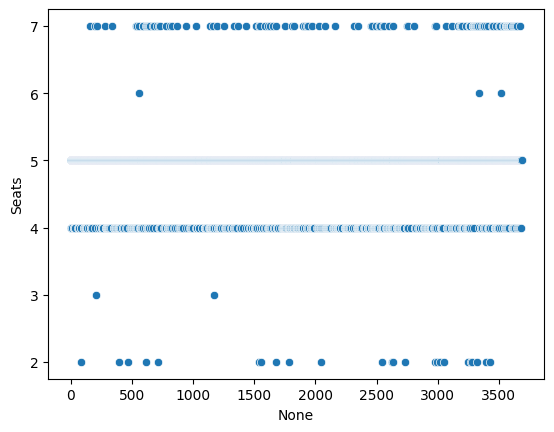

In [115]:
sns.scatterplot(x= car.index, y=car['Seats'])

<Axes: xlabel='None', ylabel='Engine'>

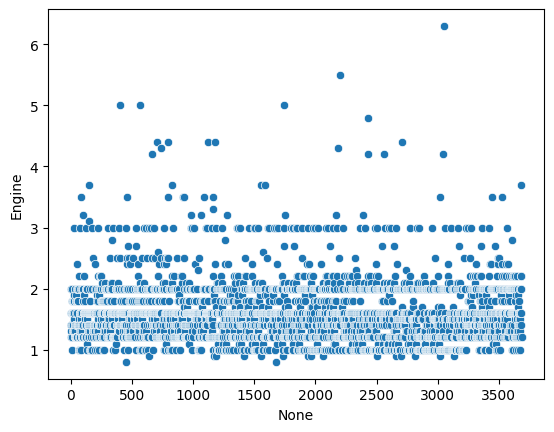

In [116]:
sns.scatterplot(x= car.index, y=car['Engine'])

그 외 이상치가 의심 될 만한 데이터 확인했지만 크게 이상은 없어 보임



스케일 활용

*   이상치 결측치를 전부 제거한 상황 정규 분포로 가정하에 스탠다드 스케일링으로 진행







In [117]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3592 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3592 non-null   object 
 1   Price              3592 non-null   int64  
 2   Mileage(miles)     3592 non-null   int64  
 3   Registration_Year  3592 non-null   int64  
 4   Previous Owners    3592 non-null   float64
 5   Fuel type          3592 non-null   object 
 6   Body type          3592 non-null   object 
 7   Engine             3592 non-null   float64
 8   Gearbox            3592 non-null   object 
 9   Doors              3592 non-null   float64
 10  Seats              3592 non-null   float64
 11  Emission Class     3592 non-null   object 
 12  Service history    3592 non-null   object 
 13  brand              3592 non-null   object 
 14  country            3592 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 578.0+ KB


In [118]:
#카테고리형 변수를 숫자형으로 변경
df = pd.get_dummies(car,columns=['title','Fuel type','Body type','Gearbox','Service history','brand','country','Emission Class'])

In [119]:
df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,title_ABARTH 500,title_ABARTH 595,title_ABARTH FIAT 595 1.4 TJET (165PS) SCORPIONEORO,...,country_Spain,country_Sweden,country_United Kingdom,country_United States,Emission Class_Euro 1,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6
0,6900,70189,2016,3.000000,1.4,5.0,5.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1495,88585,2008,4.000000,1.2,3.0,5.0,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,949,137000,2011,2.807557,1.4,5.0,5.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,2395,96731,2010,5.000000,1.4,3.0,4.0,False,False,False,...,False,False,True,False,False,False,False,True,False,False
4,1000,85000,2013,2.807557,1.3,5.0,5.0,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,1395,76202,2006,4.000000,1.6,5.0,5.0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3683,6990,119000,2012,2.807557,2.0,4.0,5.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3684,3995,139000,2013,2.807557,2.0,4.0,5.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3685,1390,179190,2007,2.807557,2.2,5.0,5.0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [120]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

In [121]:
ss.fit(df)
ss_df = pd.DataFrame(ss.transform(df),columns = df.columns)
ss_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,title_ABARTH 500,title_ABARTH 595,title_ABARTH FIAT 595 1.4 TJET (165PS) SCORPIONEORO,...,country_Spain,country_Sweden,country_United Kingdom,country_United States,Emission Class_Euro 1,Emission Class_Euro 2,Emission Class_Euro 3,Emission Class_Euro 4,Emission Class_Euro 5,Emission Class_Euro 6
0,0.245251,-0.309807,0.853301,0.159699,-0.418315,0.690602,0.17570,-0.016688,-0.016688,-0.016688,...,-0.129227,-0.112636,-0.499826,-0.37217,-0.016688,-0.080277,-0.19913,-0.649624,-0.733261,1.496313
1,-0.951941,0.206621,-0.834855,0.982041,-0.830321,-1.337723,0.17570,-0.016688,-0.016688,-0.016688,...,-0.129227,-0.112636,2.000696,-0.37217,-0.016688,-0.080277,-0.19913,1.539352,-0.733261,-0.668309
2,-1.072879,1.565771,-0.201796,0.001445,-0.418315,0.690602,0.17570,-0.016688,-0.016688,-0.016688,...,-0.129227,-0.112636,-0.499826,-0.37217,-0.016688,-0.080277,-0.19913,-0.649624,1.363771,-0.668309
3,-0.752594,0.435303,-0.412816,1.804383,-0.418315,-1.337723,-1.56291,-0.016688,-0.016688,-0.016688,...,-0.129227,-0.112636,2.000696,-0.37217,-0.016688,-0.080277,-0.19913,1.539352,-0.733261,-0.668309
4,-1.061582,0.105980,0.220243,0.001445,-0.624318,0.690602,0.17570,-0.016688,-0.016688,-0.016688,...,-0.129227,-0.112636,2.000696,-0.37217,-0.016688,-0.080277,-0.19913,-0.649624,1.363771,-0.668309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,-0.974091,-0.141005,-1.256894,0.982041,-0.006309,0.690602,0.17570,-0.016688,-0.016688,-0.016688,...,-0.129227,-0.112636,-0.499826,-0.37217,-0.016688,-0.080277,-0.19913,1.539352,-0.733261,-0.668309
3588,0.265185,1.060458,0.009223,0.001445,0.817704,-0.323561,0.17570,-0.016688,-0.016688,-0.016688,...,-0.129227,-0.112636,-0.499826,-0.37217,-0.016688,-0.080277,-0.19913,-0.649624,1.363771,-0.668309
3589,-0.398199,1.621916,0.220243,0.001445,0.817704,-0.323561,0.17570,-0.016688,-0.016688,-0.016688,...,-0.129227,-0.112636,-0.499826,-0.37217,-0.016688,-0.080277,-0.19913,-0.649624,1.363771,-0.668309
3590,-0.975198,2.750166,-1.045874,0.001445,1.229710,0.690602,0.17570,-0.016688,-0.016688,-0.016688,...,-0.129227,-0.112636,-0.499826,-0.37217,-0.016688,-0.080277,-0.19913,1.539352,-0.733261,-0.668309


기존 데이터 70% 이상을 가지는 수준에서의 주성분 추출(PCA)

In [122]:
from sklearn.decomposition import PCA
pca = PCA(0.7)
pca.fit(ss_df)
pca1 = pd.DataFrame(pca.transform(ss_df))

In [123]:
pca1

,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
0,-0.716317,2.100169,2.173781,-2.383912,-0.187655,-0.814205,1.963391,2.628399,10.334811,-5.712350,...,0.055653,0.006793,0.112496,-0.022600,-0.014745,-0.036041,0.117325,0.037086,0.025998,-0.057207
1,-2.128321,-1.594124,-1.248654,-0.543760,3.133028,0.648323,-0.143077,-0.199257,-0.160017,-0.084259,...,0.001277,-0.002432,-0.001769,-0.000526,0.004438,-0.001072,0.002908,0.002103,0.000236,-0.001226
2,-1.631281,-0.881342,0.985189,0.723300,-0.370783,-0.303774,4.921316,1.288297,-3.532678,-2.125067,...,0.036254,-0.062531,-0.072365,0.014543,-0.046310,0.005832,0.028073,0.110618,0.048423,0.085904
3,-1.769398,-1.806594,-2.763762,-0.148479,2.366915,0.394492,0.012088,-0.573958,0.079517,-0.010349,...,-0.016441,-0.007287,-0.010865,-0.002098,-0.020814,-0.040173,-0.012232,-0.011810,0.000585,-0.002525
4,-1.448109,-0.373396,0.172611,-1.429917,3.344269,0.132460,-0.097296,0.306129,-0.008824,-0.333019,...,0.001200,-0.001447,-0.000955,-0.001075,0.004873,-0.000966,0.002900,0.001728,-0.000184,-0.001294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3587,-1.586315,-1.482284,0.944240,-1.702860,-1.156435,-2.488858,-1.865440,-0.633389,-1.275390,-0.199504,...,0.022495,-0.046911,-0.014212,-0.024417,-0.043129,-0.092680,0.023744,-0.065845,-0.009980,-0.015757
3588,2.603409,-0.595835,-1.054166,-0.490227,-0.417647,0.403639,-0.165013,0.981074,-0.399570,-0.241929,...,-0.064266,-0.081634,0.041781,-0.058066,0.020078,0.021530,0.011927,-0.060558,0.023652,0.026269
3589,4.073237,-0.255857,-0.555625,-0.857495,-0.357909,0.275880,-0.282398,0.842992,-0.249058,-0.398258,...,0.000324,-0.000055,0.000082,0.000043,0.000032,0.000664,-0.000509,-0.000008,0.000137,0.000233
3590,1.911220,-2.379833,3.167972,2.103650,0.037943,-0.863742,-0.210242,-0.184999,0.993687,0.302050,...,0.261163,-0.120825,0.059137,0.017380,0.113872,0.025603,-0.022282,-0.112718,-0.019110,0.392174


In [124]:
(pca.explained_variance_ratio_).sum()

np.float64(0.7014326386463232)

상관관계가 높은 변수 찾기

In [125]:
import matplotlib.pyplot as plt

In [126]:
#데이터 프레임 car로 사용
corr = car.corr(numeric_only=True) #숫자형 변수만 선택
corr

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats
Price,1.000000,-0.553110,0.785894,-0.404745,-0.025360,0.113354,-0.025269
Mileage(miles),-0.553110,1.000000,-0.479144,0.290659,0.362879,-0.025884,0.118327
Registration_Year,0.785894,-0.479144,1.000000,-0.404480,-0.295874,0.212822,0.025855
Previous Owners,-0.404745,0.290659,-0.404480,1.000000,0.143688,-0.111244,-0.018419
Engine,-0.025360,0.362879,-0.295874,0.143688,1.000000,-0.059913,0.072900
Doors,0.113354,-0.025884,0.212822,-0.111244,-0.059913,1.000000,0.498149
Seats,-0.025269,0.118327,0.025855,-0.018419,0.072900,0.498149,1.000000


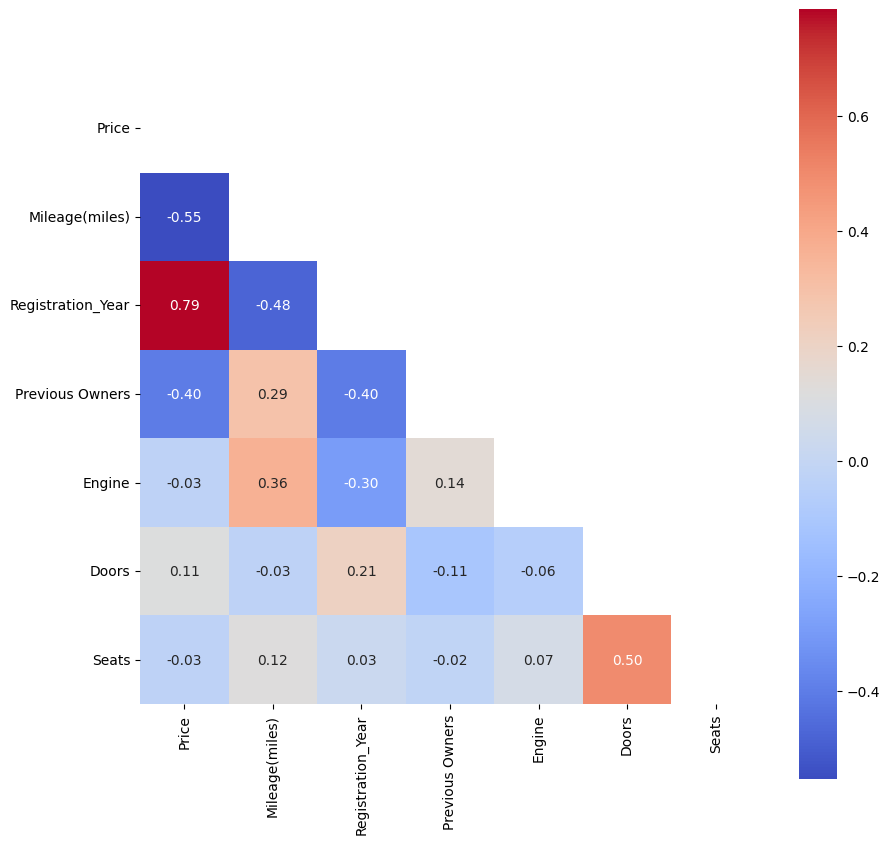

In [127]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap = 'coolwarm',
            annot=True, fmt='.2f', cbar = True, square = True)
plt.show()

자료를 볼때 Price 와의 상관관계가 높은 변수는 Registration_Year가 0.79로  높은 것을 볼 수 있다

그 외 주행 거리, 차주의 수가 뒤를 잇는것을 확인 할 수 있다.

In [128]:
#국가별 차량 등록 수
car['country'].value_counts()

,count
country,
Germany,841
United Kingdom,718
Japan,590
France,518
United States,437
South Korea,178
Italy,127
Czech Republic,63
Spain,59


In [133]:
#국가별 자동차 평균 가격 알아보기
car1 = car[['Price','country']]
car1

,Price,country
0,6900,Czech Republic
1,1495,United Kingdom
2,949,South Korea
3,2395,United Kingdom
4,1000,United Kingdom
...,...,...
3682,1395,France
3683,6990,Germany
3684,3995,Germany
3685,1390,Japan


In [144]:
car2 = car1.groupby('country')['Price'].mean()

<Axes: xlabel='country'>

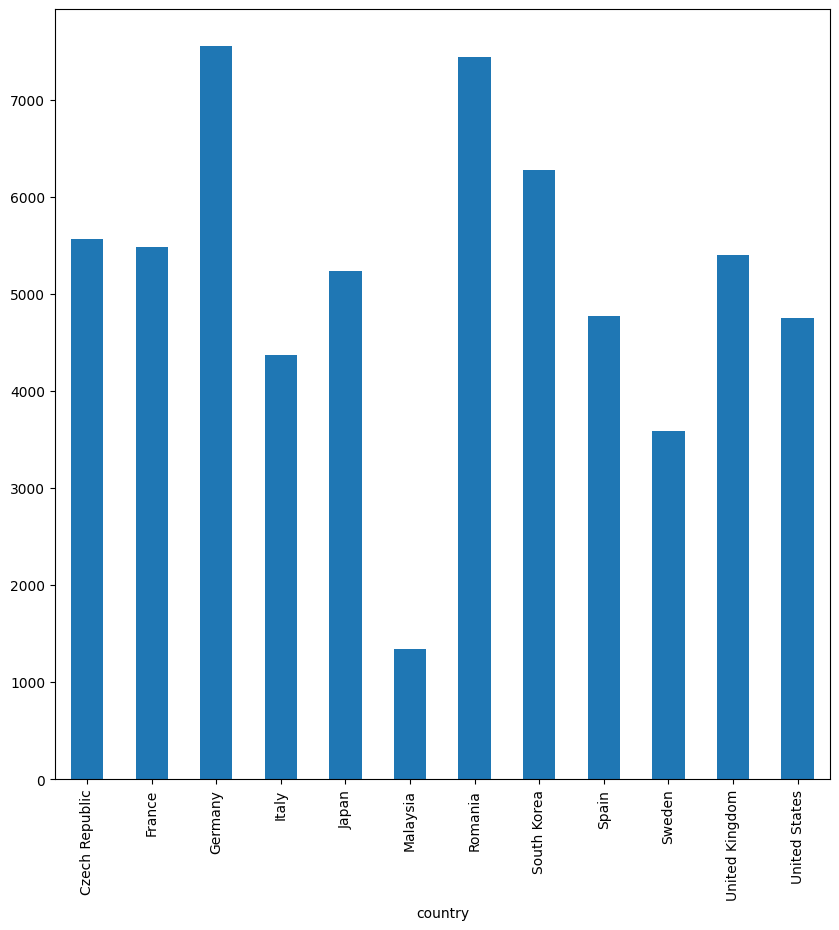

In [143]:
car2.plot(kind = 'bar',
          figsize = (10,10))

타 국가와 비교해 독일의 차가 인기와 평균가격이 높다는 것을 알 수 있다.